Данные  

Игра содержит особое событие – ивент, для прохождения которого пользователи могут тратить деньги. Группа дизайнеров решила поменять вид окошка покупки ивентовых продуктов. Чтобы оценить результат нововведения, провели АБ тест, разделив пользователей на две группы: контрольную и тестовую (с окошком нового типа). 

Задача  
**Исследовать какая из АБ групп лучше себя показала.
Результаты предоставить в понятной для широкой аудитории форме, сопроводив по необходимости графиками/дашбордами/числами.**

Колонки
1. AbGroup – имя АБ группы: Control/Test
2. user_id – id пользователя
3. time_stamp – день события
4. install_date – день установки приложения пользователем
5. event_name – техническое название события (InAppPurchase - в случае покупки за деньги, ResourceSpend в случае покупки за игровую валюту)
6. platform – платформа google / itunes
7. network_name – пользователь установил игру по переходу с рекламы (Paid) или нет (Organic)
8. country_name – страна пользователя
9. InGameTime – сколько всего пользователь провел в игре секунд
10. LastCompletedLevel – номер последнего пройденного уровня
11. avg_energy_amount – сколько в среднем энергии было у пользователя за день
12. revenue_on_event – ревеню, потраченное на покупку ивентовых продуктов
13. revenue_on_other_activities – ревеню, потраченное на остальные продукты, включая золото
14. gold_on_event – золото, потраченное на ивентный прогресс
15. gold_on_other_activities – золото, потраченное на другие продукты

# Import и загрузка данных

https://drive.google.com/file/d/15YZTzYXI4gDTWQump88o0XXQpQNlXNi3/view?usp=sharing

In [30]:
!gdown --id 15YZTzYXI4gDTWQump88o0XXQpQNlXNi3

Downloading...
From: https://drive.google.com/uc?id=15YZTzYXI4gDTWQump88o0XXQpQNlXNi3
To: /content/test_task_product_analyst_2021_20210427.csv
100% 102M/102M [00:00<00:00, 198MB/s] 


In [76]:
import pandas as pd
import numpy as np

from tqdm.notebook import tqdm

In [32]:
df = pd.read_csv('/content/test_task_product_analyst_2021_20210427.csv')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696840 entries, 0 to 696839
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   AbGroup                      696840 non-null  object 
 1   user_id                      696840 non-null  object 
 2   time_stamp                   696840 non-null  object 
 3   install_date                 696840 non-null  object 
 4   event_name                   696840 non-null  object 
 5   platform                     696840 non-null  object 
 6   network_name                 696840 non-null  object 
 7   country_name                 696840 non-null  object 
 8   InGameTime                   696840 non-null  int64  
 9   LastCompletedLevel           696840 non-null  int64  
 10  avg_energy_amount            696840 non-null  float64
 11  revenue_on_event             696840 non-null  float64
 12  revenue_on_other_activities  696840 non-null  float64
 13 

In [34]:
df.head()

,AbGroup,user_id,time_stamp,install_date,event_name,platform,network_name,country_name,InGameTime,LastCompletedLevel,avg_energy_amount,revenue_on_event,revenue_on_other_activities,gold_on_event,gold_on_other_activities
0,Control,d60ebcaecff2dc1d360a8a41271e6fd8a902c107,2020-02-10,2019-11-10,ResourceSpend,itunes,Organic,United Kingdom of Great Britain and Northern I...,276180,345,54.0,0.0,0.0,NaN,NaN
1,Test,f6e385b0ab43d5aea9cfcc408aa84029a4ea5fdb,2020-03-04,2019-11-05,ResourceSpend,itunes,Paid,United States of America,166095,199,50.0,0.0,0.0,NaN,NaN
2,Control,a4c80c8524e2c11cc238553d7b02da01ce2aad66,2020-02-26,2020-01-02,ResourceSpend,itunes,Paid,Canada,240986,84,39.0,0.0,0.0,NaN,NaN
3,Control,7ea2e4599ae33760c307e254839317bd5b17a63c,2020-02-21,2020-01-13,ResourceSpend,itunes,Organic,France,989822,1176,21.0,0.0,0.0,NaN,NaN
4,Control,6495168982929360dc6d84bf0766d8963a7ddc41,2020-02-18,2020-02-05,ResourceSpend,itunes,Paid,Spain,52106,66,43.0,0.0,0.0,500.0,NaN


Колонки
1. AbGroup – имя АБ группы: Control/Test
2. user_id – id пользователя
3. time_stamp – день события
4. install_date – день установки приложения пользователем
5. event_name – техническое название события (InAppPurchase - в случае покупки за деньги, ResourceSpend в случае покупки за игровую валюту)
6. platform – платформа google / itunes
7. network_name – пользователь установил игру по переходу с рекламы (Paid) или нет (Organic)
8. country_name – страна пользователя
9. InGameTime – сколько всего пользователь провел в игре секунд
10. LastCompletedLevel – номер последнего пройденного уровня
11. avg_energy_amount – сколько в среднем энергии было у пользователя за день
12. revenue_on_event – ревеню, потраченное на покупку ивентовых продуктов
13. revenue_on_other_activities – ревеню, потраченное на остальные продукты, включая золото
14. gold_on_event – золото, потраченное на ивентный прогресс
15. gold_on_other_activities – золото, потраченное на другие продукты

# Предобработка

In [35]:
df.columns = df.columns.str.lower()

In [36]:
df['time_stamp'] = pd.to_datetime(df['time_stamp'],format='%Y-%m-%d')

In [37]:
df['install_date'] = pd.to_datetime(df['install_date'],format='%Y-%m-%d')

# Исследовательский анализ

In [38]:
df['abgroup'].value_counts()

Control    558070
Test       138770
Name: abgroup, dtype: int64

In [39]:
df['abgroup'].value_counts(normalize=True)

Control    0.800858
Test       0.199142
Name: abgroup, dtype: float64

80/20

In [40]:
df.groupby('abgroup')['user_id'].agg(['count','nunique'])

,count,nunique
abgroup,,
Control,558070,89034
Test,138770,22278


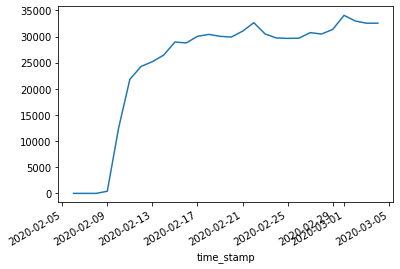

In [41]:
df.groupby('time_stamp')['user_id'].count().plot()

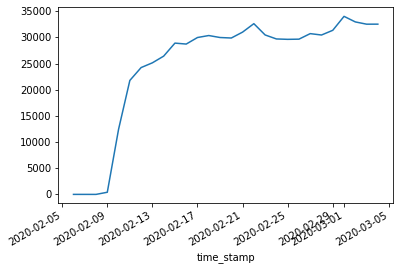

In [42]:
df.groupby('time_stamp')['user_id'].nunique().plot()

In [43]:
df.groupby('time_stamp')['user_id'].agg(['count','nunique'])

,count,nunique
time_stamp,,
2020-02-06,4,3
2020-02-08,1,1
2020-02-09,413,410
2020-02-10,12472,12445
2020-02-11,21822,21767
2020-02-12,24292,24225
2020-02-13,25194,25131
2020-02-14,26464,26407
2020-02-15,28959,28894


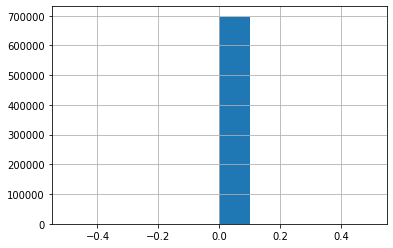

In [44]:
df['revenue_on_event'].hist()

In [45]:
df['revenue_on_event'].describe()

count    696840.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: revenue_on_event, dtype: float64

In [46]:
df['revenue_on_other_activities'].describe()

count    696840.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: revenue_on_other_activities, dtype: float64

In [47]:
df[['revenue_on_event',
    'revenue_on_other_activities', 'gold_on_event',
    'gold_on_other_activities']].describe()

,revenue_on_event,revenue_on_other_activities,gold_on_event,gold_on_other_activities
count,696840.0,696840.0,45412.000000,168193.000000
mean,0.0,0.0,1992.865322,936.481899
std,0.0,0.0,3895.541280,3522.989145
min,0.0,0.0,500.000000,100.000000
25%,0.0,0.0,500.000000,500.000000
50%,0.0,0.0,1000.000000,600.000000
75%,0.0,0.0,2400.000000,1000.000000
max,0.0,0.0,189600.000000,755950.000000


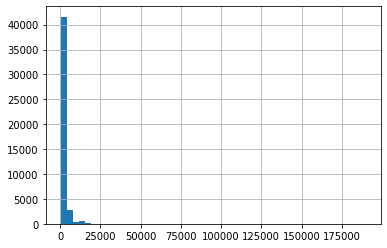

In [48]:
df['gold_on_event'].hist(bins=50)

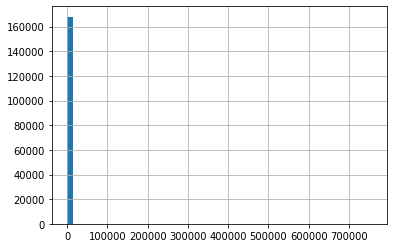

In [49]:
df['gold_on_other_activities'].hist(bins=50)

In [50]:
df['gold_on_event_flag'] = (df['gold_on_event'] > 0)*1
df['gold_on_other_activities_flag'] = (df['gold_on_other_activities'] > 0)*1

In [51]:
(df.groupby(['abgroup'])[['gold_on_event_flag','gold_on_event']].agg({'gold_on_event_flag':['count','mean'],
                                                                      'gold_on_event':['mean','median']}))

gold_on_event_flag          gold_on_event        
                     count     mean          mean  median
abgroup                                                  
Control             558070  0.06523   1965.211658  1000.0
Test                138770  0.06492   2104.606505  1500.0

In [52]:
t = df.groupby('user_id')['abgroup'].nunique().query('abgroup > 2').reset_index()

In [53]:
t

,user_id,abgroup
0,00000d6d79ec151d74c5b0c0705d9d9fe252fe83,1
1,000133682d2dcd90c1a9c8ca5e34a294f31af64f,1
2,0001f13b0535b174bc7e36a1846c31c7a091c4b0,1
3,00021d57aced59fbfaf63ba620afada82fc06ca8,1
4,00027b7d34e10c17bfd4f76aa626403a2c5d1044,1
...,...,...
110955,fffea25b3877c861a4ebaa00e8fb9c5b96672e00,1
110956,fffeb6c54253ef0e7b0c4f38eb81a9dd9aebcb14,1
110957,ffff1964e1cb3bb0fc17c9ed440e3a6b6e6adf99,1
110958,ffff86c1dc72ba25d61ad8c92e9a5b3d6e2f5547,1


In [55]:
t[t['abgroup'] > 1]

,user_id,abgroup
202,007a61c7cc84aa559280c6d222aa3e15cb5e0114,2
208,007c891d5eb34c1398966a836d74a123452384de,2
895,02125379d8faf43debf755edfb32758ea5d789d8,2
1097,028e3fc09324ac6df71fccf432dabe44e476956c,2
1107,02977b73d35305fc135ea01bfcc9e1aa334d480a,2
...,...,...
110097,fe08c305b0317eecc6b5cf3cc5362fc912afdc0b,2
110362,fea60891a7ef95c7b95a0b1e58cb9d755684b3de,2
110480,fef449646b98d04def88b9ddb45e7c43bd9a278a,2
110515,ff079e7288b379b4e47650da302a5cc23e8c7ad3,2


In [56]:
t = (df.groupby(['user_id','abgroup'])[['gold_on_event_flag','gold_on_event']]
                                              .agg({'gold_on_event_flag':['count','mean'],
                                                    'gold_on_event':['mean','median']})).reset_index()

In [57]:
t

user_id  abgroup  ... gold_on_event        
                                                           ...          mean  median
0       00000d6d79ec151d74c5b0c0705d9d9fe252fe83  Control  ...           NaN     NaN
1       000133682d2dcd90c1a9c8ca5e34a294f31af64f  Control  ...        1250.0  1250.0
2       0001f13b0535b174bc7e36a1846c31c7a091c4b0  Control  ...           NaN     NaN
3       00021d57aced59fbfaf63ba620afada82fc06ca8     Test  ...           NaN     NaN
4       00027b7d34e10c17bfd4f76aa626403a2c5d1044     Test  ...           NaN     NaN
...                                          ...      ...  ...           ...     ...
111307  fffea25b3877c861a4ebaa00e8fb9c5b96672e00  Control  ...           NaN     NaN
111308  fffeb6c54253ef0e7b0c4f38eb81a9dd9aebcb14  Control  ...           NaN     NaN
111309  ffff1964e1cb3bb0fc17c9ed440e3a6b6e6adf99  Control  ...           NaN     NaN
111310  ffff86c1dc72ba25d61ad8c92e9a5b3d6e2f5547  Control  ...           NaN     NaN
111311  ffffb50d0170ef0bc2eda7d20211b2c963c61e2a  Control  ...           NaN     NaN

[111312 rows x 6 columns]

Уберем 2х этажный индекс

In [58]:
t.columns = ['_'.join(el) for el in t.columns.to_flat_index()]

In [59]:
t

,user_id_,abgroup_,gold_on_event_flag_count,gold_on_event_flag_mean,gold_on_event_mean,gold_on_event_median
0,00000d6d79ec151d74c5b0c0705d9d9fe252fe83,Control,2,0.000000,NaN,NaN
1,000133682d2dcd90c1a9c8ca5e34a294f31af64f,Control,19,0.105263,1250.0,1250.0
2,0001f13b0535b174bc7e36a1846c31c7a091c4b0,Control,11,0.000000,NaN,NaN
3,00021d57aced59fbfaf63ba620afada82fc06ca8,Test,13,0.000000,NaN,NaN
4,00027b7d34e10c17bfd4f76aa626403a2c5d1044,Test,7,0.000000,NaN,NaN
...,...,...,...,...,...,...
111307,fffea25b3877c861a4ebaa00e8fb9c5b96672e00,Control,1,0.000000,NaN,NaN
111308,fffeb6c54253ef0e7b0c4f38eb81a9dd9aebcb14,Control,5,0.000000,NaN,NaN
111309,ffff1964e1cb3bb0fc17c9ed440e3a6b6e6adf99,Control,6,0.000000,NaN,NaN
111310,ffff86c1dc72ba25d61ad8c92e9a5b3d6e2f5547,Control,5,0.000000,NaN,NaN


In [64]:
t['user'] = 1

In [65]:
t.columns

Index(['user_id_', 'abgroup_', 'gold_on_event_flag_count',
       'gold_on_event_flag_mean', 'gold_on_event_mean', 'gold_on_event_median',
       'user'],
      dtype='object')

In [68]:
t.groupby('abgroup_').agg(['count','mean'])

gold_on_event_flag_count            ...   user     
                            count      mean  ...  count mean
abgroup_                                     ...            
Control                     89034  6.268055  ...  89034    1
Test                        22278  6.229015  ...  22278    1

[2 rows x 10 columns]

In [70]:
df.head()

,abgroup,user_id,time_stamp,install_date,event_name,platform,network_name,country_name,ingametime,lastcompletedlevel,avg_energy_amount,revenue_on_event,revenue_on_other_activities,gold_on_event,gold_on_other_activities,gold_on_event_flag,gold_on_other_activities_flag
0,Control,d60ebcaecff2dc1d360a8a41271e6fd8a902c107,2020-02-10,2019-11-10,ResourceSpend,itunes,Organic,United Kingdom of Great Britain and Northern I...,276180,345,54.0,0.0,0.0,NaN,NaN,0,0
1,Test,f6e385b0ab43d5aea9cfcc408aa84029a4ea5fdb,2020-03-04,2019-11-05,ResourceSpend,itunes,Paid,United States of America,166095,199,50.0,0.0,0.0,NaN,NaN,0,0
2,Control,a4c80c8524e2c11cc238553d7b02da01ce2aad66,2020-02-26,2020-01-02,ResourceSpend,itunes,Paid,Canada,240986,84,39.0,0.0,0.0,NaN,NaN,0,0
3,Control,7ea2e4599ae33760c307e254839317bd5b17a63c,2020-02-21,2020-01-13,ResourceSpend,itunes,Organic,France,989822,1176,21.0,0.0,0.0,NaN,NaN,0,0
4,Control,6495168982929360dc6d84bf0766d8963a7ddc41,2020-02-18,2020-02-05,ResourceSpend,itunes,Paid,Spain,52106,66,43.0,0.0,0.0,500.0,NaN,1,0


In [71]:
(df.groupby(['abgroup'])[['gold_on_event_flag','gold_on_event']].agg({'gold_on_event_flag':['count','mean'],
                                                                      'gold_on_event':['mean','median']}))

gold_on_event_flag          gold_on_event        
                     count     mean          mean  median
abgroup                                                  
Control             558070  0.06523   1965.211658  1000.0
Test                138770  0.06492   2104.606505  1500.0

In [69]:
group_size = df['abgroup'].value_counts().values

In [72]:
group_size

array([558070, 138770])

## Bootstrap

### median

In [77]:
n = 1000
result = []
base_diff = 500

for _ in tqdm(range(n)):
  a = df.sample(group_size[0],replace=True)['gold_on_event'].median()
  b = df.sample(group_size[1],replace=True)['gold_on_event'].median()
  result.append(np.abs(a-b) >= base_diff)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [79]:
np.mean(result)

0.126

In [80]:
df

,abgroup,user_id,time_stamp,install_date,event_name,platform,network_name,country_name,ingametime,lastcompletedlevel,avg_energy_amount,revenue_on_event,revenue_on_other_activities,gold_on_event,gold_on_other_activities,gold_on_event_flag,gold_on_other_activities_flag
0,Control,d60ebcaecff2dc1d360a8a41271e6fd8a902c107,2020-02-10,2019-11-10,ResourceSpend,itunes,Organic,United Kingdom of Great Britain and Northern I...,276180,345,54.0,0.0,0.0,NaN,NaN,0,0
1,Test,f6e385b0ab43d5aea9cfcc408aa84029a4ea5fdb,2020-03-04,2019-11-05,ResourceSpend,itunes,Paid,United States of America,166095,199,50.0,0.0,0.0,NaN,NaN,0,0
2,Control,a4c80c8524e2c11cc238553d7b02da01ce2aad66,2020-02-26,2020-01-02,ResourceSpend,itunes,Paid,Canada,240986,84,39.0,0.0,0.0,NaN,NaN,0,0
3,Control,7ea2e4599ae33760c307e254839317bd5b17a63c,2020-02-21,2020-01-13,ResourceSpend,itunes,Organic,France,989822,1176,21.0,0.0,0.0,NaN,NaN,0,0
4,Control,6495168982929360dc6d84bf0766d8963a7ddc41,2020-02-18,2020-02-05,ResourceSpend,itunes,Paid,Spain,52106,66,43.0,0.0,0.0,500.0,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696835,Control,cb394bfaa14de91ca99f566e1cede909285dc338,2020-03-01,2019-11-03,ResourceSpend,itunes,Paid,Canada,73805,101,23.0,0.0,0.0,NaN,NaN,0,0
696836,Test,b61b6d950bc376fc23581fa9c8e4d3c75d2dcd9a,2020-03-04,2020-01-03,ResourceSpend,itunes,Organic,Spain,733369,415,62.0,0.0,0.0,NaN,NaN,0,0
696837,Control,be989a271b16dfa4e9ac2d877a07ce0f2fdb456c,2020-02-29,2019-01-13,ResourceSpend,itunes,Organic,Germany,75273,331,22.0,0.0,0.0,NaN,NaN,0,0
696838,Control,5435fa8319c96097de76557f077659ce4f187262,2020-02-28,2019-02-14,ResourceSpend,itunes,Organic,Germany,908230,1287,58.0,0.0,0.0,NaN,NaN,0,0


### mean

In [81]:
(df.groupby(['abgroup'])[['gold_on_event_flag','gold_on_event']].agg({'gold_on_event_flag':['count','mean'],
                                                                      'gold_on_event':['mean','median']}))

gold_on_event_flag          gold_on_event        
                     count     mean          mean  median
abgroup                                                  
Control             558070  0.06523   1965.211658  1000.0
Test                138770  0.06492   2104.606505  1500.0

In [82]:
n = 1000
result = []
base_diff = 2104.606505 - 1965.211658

for _ in tqdm(range(n)):
  a = df.sample(group_size[0],replace=True)['gold_on_event'].mean()
  b = df.sample(group_size[1],replace=True)['gold_on_event'].mean()
  result.append(np.abs(a-b) >= base_diff)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [83]:
np.mean(result)

0.002

Средний чек среди тех, кто платит в каждой группе - не отличается.

С вероятностью 99,98 % результаты не случайны. 

Заполню пустые значения 0. И сравню полученные результаты.


In [87]:
df['gold_on_event_nona'] = df['gold_on_event'].fillna(0)

In [88]:
(df.groupby(['abgroup'])[['gold_on_event_flag','gold_on_event']].agg({'gold_on_event_flag':['count','mean'],
                                                                      'gold_on_event':['mean','median']}))

gold_on_event_flag          gold_on_event        
                     count     mean          mean  median
abgroup                                                  
Control             558070  0.06523   1965.211658  1000.0
Test                138770  0.06492   2104.606505  1500.0

In [89]:
(df.groupby(['abgroup'])[['gold_on_event_nona']].agg(['mean','median']))

gold_on_event_nona       
                      mean median
abgroup                          
Control         128.191087    0.0
Test            136.631837    0.0

Поскольку в данных очень много Nan, то показатель mean скорее показывает не повышение среднего чека, а количество платящих пользователей (количество != 0)

In [90]:
n = 1000
result = []
base_diff = 136.631837 - 128.191087

for _ in tqdm(range(n)):
  a = df.sample(group_size[0],replace=True)['gold_on_event_nona'].mean()
  b = df.sample(group_size[1],replace=True)['gold_on_event_nona'].mean()
  result.append(np.abs(a-b) >= base_diff)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [92]:
np.mean(result)

0.011

Вероятность того, что полученные результы случайны составляет 98.9%.

Вывод: Test group показала себя хорошо. Можно раскатывать на всю аудиторию.